# OpenCVとDlibを用いた画像認識

ここでは、カメラから取得した映像を用いて画像認識を行い、
必要な情報を取得するための流れを学ぶことで、
画像認識をビジネス現場で応用するイメージをつかみます。

### 画像データを読み込む

画像幅: 1920
画像高さ: 1440


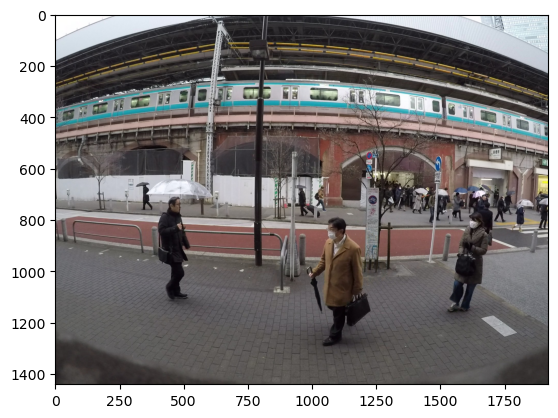

In [34]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/img01.jpg")
height, width = img.shape[:2]
print("画像幅: " + str(width))
print("画像高さ: " + str(height))

# OpenCV が画像を扱う際に色の並びが RGB ではなく BGR
# 画像を matplotlib で表示させる前に BGR の並びを RGB に変換する
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(converted_img)

### ファイルから映像データを読み込む

以下の主要な部分があります：

1. 動画ファイルを開く
2. 動画の基本情報（幅、高さ、フレーム数、FPS）の取得と表示
3. メインループでの動画処理：
    * フレームの読み込み
    * フレームのリサイズ
    * リサイズしたフレームの表示
4. 'q'キーでループ終了
5. リソースの解放

In [8]:
# 必要なライブラリをインポート
import cv2 
import matplotlib.pyplot as plt 

# 動画ファイルを開く
cap = cv2.VideoCapture("vtest.avi")  # 'vtest.avi' という名前の動画ファイルを開く

# 動画の基本情報を取得
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)  # フレームの幅を取得
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # フレームの高さを取得
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)  # 総フレーム数を取得
fps = cap.get(cv2.CAP_PROP_FPS)  # フレームレート（FPS）を取得

# 取得した動画情報を表示
print("画像幅: " + str(width)) 
print("画像高さ: " + str(height)) 
print("総フレーム数: " + str(count)) 
print("FPS: " + str(fps)) 

# メインループ：動画の各フレームを処理
while(cap.isOpened()): 
    ret, frame = cap.read()  # 1フレームずつ読み込む。retはフレームの読み込みが成功したかどうか、frameは読み込んだフレーム
    
    if ret:  # フレームの読み込みが成功した場合
        # フレームのサイズを半分に縮小
        resized_frame = cv2.resize(frame, (int(width // 2), int(height // 2)))
        
        # 縮小したフレームを表示
        cv2.imshow("frame", resized_frame) 
    
    # 'q'キーが押されたらループを終了
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break 

# リソースの解放
cap.release()  # VideoCaptureオブジェクトを解放
cv2.destroyAllWindows()  # すべてのOpenCVウィンドウを閉じる

画像幅: 768.0
画像高さ: 576.0
総フレーム数: 795.0
FPS: 10.0


### Webカメラから映像をデータを読み込む

In [26]:
# OpenCVライブラリをインポート
import cv2

# Webカメラ映像のキャプチャを開始
# 0は通常、PCに内蔵されているカメラを指す。外付けカメラを使用する場合は1や2などに変更する
# cv2.CAP_DSHOWは、Windowsでのパフォーマンス向上のために使用
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# キャプチャのプロパティを取得
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # フレームの幅を取得
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # フレームの高さを取得
fps = cap.get(cv2.CAP_PROP_FPS)             # フレームレート（FPS）を取得

# 取得したカメラのプロパティを表示
print("画像幅: " + str(width))
print("画像高さ: " + str(height))
print("FPS: " + str(fps))

# Webカメラからの映像を連続的に取得し表示するループ
while(cap.isOpened()):
    ret, frame = cap.read()  # フレームを1つ取得。retは取得成功フラグ、frameは取得した画像
    
    if ret:  # フレームの取得に成功した場合        
        # 取得したフレームを表示
        # "Webcam"は表示ウィンドウの名前
        cv2.imshow("Webcam", frame)
        
    # キー入力を1ミリ秒待機し、'q'キーが押されたかチェック
    # 0xFF == ord('q')は、押されたキーが'q'かどうかを確認
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  # 'q'キーが押されたらループを終了

# キャプチャに使用したリソースを解放
cap.release()

# 作成したすべてのOpenCVウィンドウを閉じる
cv2.destroyAllWindows()

画像幅: 640.0
画像高さ: 360.0
FPS: 0.0


### 映像を画像に分割し，保存する

主な構成要素は以下の通りです：

1. 動画ファイルを開く
2. フレーム番号の初期化
3. メインループでの動画処理：
    * フレームの読み込み
    * フレームの表示
    * スナップショットの保存
    * 'q'キーでループ終了のチェック
    * フレーム番号の更新
4. リソースの解放とウィンドウを閉じる

注意点：
1. このスクリプトは、カレントディレクトリに"snapshot"フォルダが存在することを前提としています。フォルダが存在しない場合、エラーが発生する可能性があります。
2. 動画の各フレームが保存されるため、長い動画や高解像度の動画の場合、大量のディスク容量を使用する可能性があります。

In [29]:
# OpenCVライブラリをインポート
import cv2

# 動画ファイルを開く
cap = cv2.VideoCapture("vtest.avi")  # 'vtest.avi' という名前の動画ファイルを開く

# フレーム番号の初期化
num = 0

# 動画ファイルが正常に開かれている間、ループを続ける
while(cap.isOpened()):
    # フレームを1つ読み込む
    # retは読み込み成功フラグ、frameは読み込んだ画像データ
    ret, frame = cap.read()
    
    if ret:  # フレームの読み込みに成功した場合
        # 読み込んだフレームを表示
        cv2.imshow("frame", frame)
        
        # スナップショットの保存先ファイルパスを生成
        # ファイル名は"snapshot_数字.jpg"の形式
        filepath = f"snapshot/snapshot_{num}.jpg"
        
        # 現在のフレームをJPEG画像として保存
        cv2.imwrite(filepath, frame)
        
        # 'q'キーが押されたらループを終了
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # フレーム番号を1増やす
    num += 1

# VideoCaptureオブジェクトを解放
cap.release()

# すべてのOpenCVウィンドウを閉じる
cv2.destroyAllWindows()

### 画像内のどこに人がいるのかを検出する

OpenCVを使用して画像から人物を検出するためには，一般的にHOG (Histogram of Oriented Gradients) とSVM (Support Vector Machine) を使用した人物検出がよく利用されます．以下のコードは，OpenCVのHOGDescriptorを用いて画像から人物を検出する例です．

主な構成要素は以下の通りです：
1. OpenCVライブラリのインポート
2. HOG検出器の準備と設定
3. 画像の読み込みとグレースケール変換
4. 人物検出の実行
5. 検出結果の処理（矩形描画）
6. 結果の保存

注意点：
1. 検出結果は"temp.jpg"という名前で保存されます。既存のファイルがある場合は上書きされます。
2. HOGパラメータは画像や検出対象によって調整が必要な場合があります。

In [33]:
# OpenCVライブラリをインポート
import cv2

# HOG (Histogram of Oriented Gradients) 検出器の準備
# HOGは人物検出によく使われる特徴量です
hog = cv2.HOGDescriptor()

# デフォルトの人物検出用SVMを設定
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# HOG検出器のパラメータを設定
hogParams = {
    'winStride': (8, 8),    # 検出ウィンドウの移動ステップ
    'padding': (32, 32),    # 検出ウィンドウの周りのパディング
    'scale': 1.05,          # 画像ピラミッドのスケール
    'hitThreshold': 0,      # 検出閾値
    'finalThreshold': 5     # 重複検出のフィルタリング閾値
}

# 画像の読み込み
img = cv2.imread("img/img01.jpg")

# グレースケールに変換（HOG検出器は通常グレースケール画像を使用）
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 人物検出の実行
# human: 検出された人物の座標 (x, y, width, height)
# r: 信頼度スコア（この例では使用していません）
human, r = hog.detectMultiScale(gray, **hogParams)

# 検出結果の処理
if (len(human) > 0):  # 人物が検出された場合
    for (x, y, w, h) in human:
        # 検出された人物を白い矩形で囲む
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,255,255), 3)

# 結果を画像ファイルとして保存
cv2.imwrite("temp.jpg", img)

True

### 画像内の人の顔を検出する

OpenCVライブラリを使用して画像内の顔を検出し、検出された顔の周りに赤い矩形を描画します。具体的には、Haar Cascade分類器を用いて顔検出を行い、結果を視覚化して新しい画像ファイルとして保存します。

主な処理の流れは以下の通りです：
1. 顔検出用の分類器をロード
2. 画像ファイルを読み込みグレースケールに変換
3. 顔検出を実行
4. 検出された顔の位置に矩形を描画
5. 結果を新しい画像ファイルとして保存

In [35]:
# OpenCVライブラリをインポート
import cv2

# 顔検出のための準備
# Haar Cascade分類器の XMLファイルを指定
cascade_file = "haarcascade_frontalface_alt.xml"
# 分類器をロード
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込みと顔検出
# 画像ファイルを読み込む
img = cv2.imread("img/img02.jpg")
# グレースケールに変換（顔検出はグレースケール画像で行う）
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 顔検出を実行（最小サイズを50x50ピクセルに設定）
face_list = cascade.detectMultiScale(gray, minSize=(50, 50))

# 検出した顔に矩形を描画
for (x, y, w, h) in face_list:
    color = (0, 0, 225)  # 赤色 (BGR形式)
    pen_w = 3  # 線の太さ
    # 顔の位置に矩形を描画
    cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness=pen_w)

# 結果を画像ファイルとして保存
cv2.imwrite("temp.jpg", img)

True

### 画像内の人がどこに顔を向けているのかを検出する

OpenCVとdlibライブラリを使用して、画像内の顔を検出し、顔のランドマーク（特徴点）を識別し、さらに顔の向きを推定します。顔認識システム、感情分析、AR（拡張現実）アプリケーションなどに活用できます。

主な機能は以下の通りです：
1. 顔検出：画像内の顔を検出し、矩形で囲みます。
2. ランドマーク検出：各顔に対して68個の特徴点（ランドマーク）を検出します。
3. 重心計算：顔の輪郭と内部のランドマークそれぞれの重心を計算します。
4. 顔の方向推定：2つの重心の相対位置から顔の左右の向きを推定します。
5. 視覚化：検出結果を元の画像上に描画し、新しい画像ファイルとして保存します。

In [36]:
# 必要なライブラリをインポート
import cv2
import dlib
import math

# 顔のランドマーク検出器と顔検出器の準備
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# 画像の読み込みと顔検出
img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)  # 1はアップサンプリング回数

# 検出された各顔に対して処理
for k, d in enumerate(dets):
    # 顔のランドマークを検出
    shape = predictor(img, d)
    
    # 描画用の色とパラメータを設定
    color_f = (0, 0, 225)  # 顔領域の色 (赤)
    color_l_out = (255, 0, 0)  # 外側のランドマークの色 (青)
    color_l_in = (0, 255, 0)  # 内側のランドマークの色 (緑)
    line_w = 3  # 線の太さ
    circle_r = 3  # 円の半径
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1

    # 顔領域を矩形で囲み、顔番号を表示
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心計算の準備
    num_of_points_out = 17  # 輪郭を構成するランドマークの数
    num_of_points_in = shape.num_parts - num_of_points_out  # 内側のランドマークの数
    gx_out = gy_out = gx_in = gy_in = 0  # 重心座標の初期化

    # 各ランドマークに対して処理
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        
        # ランドマークの描画と重心の計算
        if shape_point_count < num_of_points_out:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
            gx_out += shape_point.x / num_of_points_out
            gy_out += shape_point.y / num_of_points_out
        else:
            cv2.circle(img, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
            gx_in += shape_point.x / num_of_points_in
            gy_in += shape_point.y / num_of_points_in

    # 重心位置を描画
    cv2.circle(img, (int(gx_out), int(gy_out)), circle_r, (0,0,255), line_w)  # 外側の重心 (赤)
    cv2.circle(img, (int(gx_in), int(gy_in)), circle_r, (0,0,0), line_w)  # 内側の重心 (黒)

    # 顔の方向を計算
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta * 180 / math.pi
    print(f"顔方位:{theta} (角度:{radian}度)")

    # 顔の方向を画像に表示
    textPrefix = "   left " if radian < 0 else "   right "
    textShow = f"{textPrefix}{abs(radian):.1f} deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

# 処理結果の画像を保存
cv2.imwrite("temp.jpg", img)

顔方位:0.06253283992253719 (角度:3.582867808528563度)


True

### Webカメラから読み込んだ映像データから顔を検出する

Webカメラからのリアルタイム映像で顔検出、顔のランドマーク（特徴点）識別、および顔の向き推定を行います。

In [37]:
import cv2
import dlib
import math

# 顔のランドマーク検出器と顔検出器の準備
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

# Webカメラの映像キャプチャを開始
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Webカメラからの映像を連続的に処理
while cap.isOpened():
    ret, frame = cap.read()  # フレームを取得
    if ret:
        # グレースケールに変換（顔検出の精度向上のため）
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # 顔検出を実行
        dets = detector(gray, 1)  # 1はアップサンプリング回数
        
        # 検出された各顔に対して処理
        for k, d in enumerate(dets):
            # 顔のランドマークを検出
            shape = predictor(frame, d)
            
            # 描画用のパラメータ設定
            color_f = (0, 0, 225)  # 顔領域の色 (赤)
            color_l_out = (255, 0, 0)  # 外側のランドマークの色 (青)
            color_l_in = (0, 255, 0)  # 内側のランドマークの色 (緑)
            line_w = 2  # 線の太さ
            circle_r = 2  # 円の半径
            fontType = cv2.FONT_HERSHEY_SIMPLEX
            fontSize = 1

            # 顔領域を矩形で囲み、顔番号を表示
            cv2.rectangle(frame, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
            cv2.putText(frame, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

            # 重心計算の準備
            num_of_points_out = 17  # 輪郭を構成するランドマークの数
            num_of_points_in = shape.num_parts - num_of_points_out  # 内側のランドマークの数
            gx_out = gy_out = gx_in = gy_in = 0  # 重心座標の初期化

            # 各ランドマークに対して処理
            for shape_point_count in range(shape.num_parts):
                shape_point = shape.part(shape_point_count)
                # ランドマークの描画と重心の計算
                if shape_point_count < num_of_points_out:
                    cv2.circle(frame, (shape_point.x, shape_point.y), circle_r, color_l_out, line_w)
                    gx_out += shape_point.x / num_of_points_out
                    gy_out += shape_point.y / num_of_points_out
                else:
                    cv2.circle(frame, (shape_point.x, shape_point.y), circle_r, color_l_in, line_w)
                    gx_in += shape_point.x / num_of_points_in
                    gy_in += shape_point.y / num_of_points_in

            # 重心位置を描画
            cv2.circle(frame, (int(gx_out), int(gy_out)), circle_r, (0, 0, 255), line_w)  # 外側の重心 (赤)
            cv2.circle(frame, (int(gx_in), int(gy_in)), circle_r, (0, 0, 0), line_w)  # 内側の重心 (黒)

            # 顔の方向を計算
            theta = math.asin(2 * (gx_in - gx_out) / (d.right() - d.left()))
            radian = theta * 180 / math.pi

            # 顔の方向を画像に表示
            textPrefix = "   left " if radian < 0 else "   right "
            textShow = f"{textPrefix}{abs(radian):.1f} deg."
            cv2.putText(frame, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)
        
        # 処理結果をリアルタイムで表示
        cv2.imshow("Webcam", frame)
    
    # 'q'キーが押されたらループを終了
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# リソースを解放してウィンドウを閉じる
cap.release()
cv2.destroyAllWindows()

### 顔認識 (データベース無)

In [9]:
import cv2
import dlib
import numpy as np

# dlibのモデルのロード
face_detector = dlib.get_frontal_face_detector()  # 顔検出用
shape_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # 顔ランドマーク用
face_rec_model = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")  # 顔認識用

# 既知の顔のデータ（ここでは事前に特徴ベクトルを用意）
# 顔の特徴ベクトルを格納するリスト (既知の顔)
known_face_encodings = []
known_face_names = []

# Webカメラ映像のキャプチャ
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# フレーム処理
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # グレースケールに変換（検出精度向上のため）
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # 顔検出
        faces = face_detector(gray, 1)
        
        for face in faces:
            # 顔ランドマークを取得
            shape = shape_predictor(frame, face)
            
            # 顔の特徴ベクトルを計算
            face_descriptor = face_rec_model.compute_face_descriptor(frame, shape)
            face_encoding = np.array(face_descriptor)
            
            # 既知の顔と照合（簡易的に距離で比較）
            matches = []
            for known_encoding in known_face_encodings:
                dist = np.linalg.norm(known_encoding - face_encoding)
                matches.append(dist)
            
            # 閾値以下の距離なら顔が一致とみなす（例: 0.6以下）
            if matches and min(matches) < 0.6:
                match_index = matches.index(min(matches))
                name = known_face_names[match_index]
            else:
                name = "Unknown"
            
            # 顔領域の表示
            cv2.rectangle(frame, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)
            cv2.putText(frame, name, (face.left(), face.top() - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        # 結果を表示
        cv2.imshow("Webcam", frame)
    
    # 'q'キーが押されたら終了
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# リソースを解放してウィンドウを閉じる
cap.release()
cv2.destroyAllWindows()


### 検出した情報を統合し，タイムラプスを作る

入力動画からタイムラプス動画を生成し、同時に人物検出を行います。タイムラプス動画とは、長時間にわたって撮影された一連の写真や映像を、通常よりも速いペースで再生することで作成される映像技法です。この技法により、通常では目に見えないほどゆっくりとした変化や動きを、短時間で観察できるようになります。

主な機能は以下の通りです：
1. 動画読み込み：指定された動画ファイルを読み込みます。
2. タイムラプス生成：10フレームごとに1フレームを抽出し、新しい動画を作成します。
3. 人物検出：HOG（Histogram of Oriented Gradients）ディスクリプタを使用して、各フレームで人物を検出します。
4. 可視化：検出された人物の周りに白い矩形を描画します。
5. 出力：処理されたフレームを新しいタイムラプス動画として保存します。

In [13]:
import cv2

print("タイムラプス生成を開始します")

# 動画ファイルの読み込み
# cap = cv2.VideoCapture("mov/mov01.avi")  # 別の動画ファイルを使用する場合はこちらのコメントを解除
cap = cv2.VideoCapture("vtest.avi")

# 動画の基本情報を取得
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# HOG（Histogram of Oriented Gradients）人物検出器の設定
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {
    'winStride': (8, 8),    # 検出ウィンドウの移動ステップ
    'padding': (32, 32),    # 検出ウィンドウの周りのパディング
    'scale': 1.05,          # 画像ピラミッドのスケール
    'hitThreshold': 0,      # 検出閾値
    'finalThreshold': 5     # 重複検出のフィルタリング閾値
}

# タイムラプス動画の設定
movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')  # コーデックの設定
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))  # 出力動画の設定

num = 0  # フレームカウンター
while(cap.isOpened()):
    ret, frame = cap.read()  # フレームを1つ読み込む
    if ret:
        if (num % 10 == 0):  # 10フレームごとに処理（タイムラプス効果）
            # グレースケールに変換（人物検出の精度向上のため）
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # 人物検出を実行
            human, r = hog.detectMultiScale(gray, **hogParams)
            
            if (len(human) > 0):  # 人物が検出された場合
                for (x, y, w, h) in human:
                    # 検出された人物を白い矩形で囲む
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 3)
            
            # 処理したフレームをタイムラプス動画に追加
            video.write(frame)
    else:
        break  # 動画の終わりに達したらループを終了
    
    num += 1  # フレームカウンターを増加

# リソースの解放
video.release()
cap.release()
cv2.destroyAllWindows()

print("タイムラプス生成を終了しました")

タイムラプス生成を開始します
タイムラプス生成を終了しました
